<a href="https://colab.research.google.com/github/toryn13/Rexamples/blob/main/ELISA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
library(tidyverse)
library(readxl)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
%%R
download.file("https://raw.githubusercontent.com/toryn13//Rexamples/main/IL6.xlsx", "IL6.xlsx")
download.file("https://raw.githubusercontent.com/toryn13//Rexamples/main/IL6plate.xls","IL6plate.xls")

In [ ]:
%%R
elisa_data<-read_excel("IL6plate.xls", skip=1,n_max = 9)

New names:
• `` -> `...1`


In [ ]:
%%R
elisa_data

# A tibble: 8 × 10
  ...1    `1`   `2`   `3`   `4`   `5`   `6`   `7`   `8`   `9`
  <chr> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl> <dbl>
1 A     0.092 0.093 0.527 3.21  0.442  3.23 3.29  3.20  0.121
2 B     0.172 0.165 0.318 3.28  0.299  3.23 3.22  3.23  0.117
3 C     0.222 0.228 0.212 3.16  0.203  3.19 3.02  3.15  0.115
4 D     0.347 0.35  0.158 2.81  0.145  3.16 2.32  2.93  0.113
5 E     0.588 0.593 0.125 1.95  0.122  2.67 1.44  2.07  0.105
6 F     0.992 0.987 0.107 1.16  0.106  1.96 0.807 1.26  0.102
7 G     1.72  1.69  0.103 0.679 0.104  1.20 0.471 0.73  0.103
8 H     2.63  2.58  0.096 0.432 0.104  0.71 0.313 0.443 0.113


In [ ]:
%%R
il6data<-read_excel("IL6plate.xls", range = "D2:E10")

colnames(il6data)<-c("Control", "PHA")
il6data

# A tibble: 8 × 2
  Control   PHA
    <dbl> <dbl>
1   0.527 3.21 
2   0.318 3.28 
3   0.212 3.16 
4   0.158 2.81 
5   0.125 1.95 
6   0.107 1.16 
7   0.103 0.679
8   0.096 0.432


In [ ]:
%%R
standards<-read_excel("IL6plate.xls", range = "A14:D22")
colnames(standards)<-c("cell", "Conc", "rep1", "rep2")

New names:
• `` -> `...1`
• `` -> `...4`


In [ ]:
%%R
standardsL<-pivot_longer(standards, starts_with("rep"), names_to = "replicate", values_to = "Abs")

In [ ]:
%%R
standardsL

# A tibble: 16 × 4
   cell    Conc replicate   Abs
   <chr>  <dbl> <chr>     <dbl>
 1 A       0    rep1      0.054
 2 A       0    rep2      0.052
 3 B       7.81 rep1      0.134
 4 B       7.81 rep2      0.126
 5 C      15.6  rep1      0.183
 6 C      15.6  rep2      0.187
 7 D      31.2  rep1      0.307
 8 D      31.2  rep2      0.31 
 9 E      62.5  rep1      0.548
10 E      62.5  rep2      0.553
11 F     125    rep1      0.953
12 F     125    rep2      0.949
13 G     250    rep1      1.68 
14 G     250    rep2      1.65 
15 H     500    rep1      2.59 
16 H     500    rep2      2.54 


In [ ]:
%%R
install.packages("cowplot")

In [ ]:
%%R
library(cowplot)

Attaching package: ‘cowplot’



    stamp




`geom_smooth()` using formula = 'y ~ x'


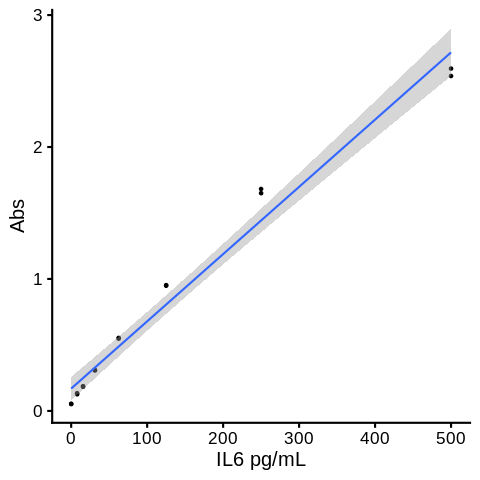

In [ ]:
%%R
curve<-standardsL%>%ggplot(aes(Conc,Abs))+geom_point()+geom_smooth(method="lm")+theme_cowplot(font_size=20, line_size = 1)+xlab(c("IL6 pg/mL"))
curve

In [ ]:
%%R
mean_standards<-standardsL%>%group_by(Conc)%>%summarise(meanAbs=mean(Abs))
mean_standards

# A tibble: 8 × 2
    Conc meanAbs
   <dbl>   <dbl>
1   0      0.053
2   7.81   0.13 
3  15.6    0.185
4  31.2    0.308
5  62.5    0.550
6 125      0.951
7 250      1.67 
8 500      2.57 


In [ ]:
%%R
calc<-lm(meanAbs~Conc, data=mean_standards)

In [ ]:
%%R
summary(calc)


Call:
lm(formula = meanAbs ~ Conc, data = mean_standards)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.15098 -0.08840 -0.04199  0.08324  0.22286 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.1693065  0.0633797   2.671    0.037 *  
Conc        0.0050953  0.0003105  16.410 3.26e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1424 on 6 degrees of freedom
Multiple R-squared:  0.9782,	Adjusted R-squared:  0.9746 
F-statistic: 269.3 on 1 and 6 DF,  p-value: 3.262e-06



In [ ]:
%%R
il6data<-il6data%>%mutate(Concon=(Control-0.1693065)/0.0050953, PHAconc=(PHA-0.1693065)/0.0050953)

In [ ]:
%%R
il6data

# A tibble: 8 × 4
  Control   PHA Concon PHAconc
    <dbl> <dbl>  <dbl>   <dbl>
1   0.527 3.21   70.2    598. 
2   0.318 3.28   29.2    611. 
3   0.212 3.16    8.38   586. 
4   0.158 2.81   -2.22   518. 
5   0.125 1.95   -8.70   349. 
6   0.107 1.16  -12.2    194. 
7   0.103 0.679 -13.0    100. 
8   0.096 0.432 -14.4     51.6


In [ ]:
%%R
IL6<-read_excel("IL6.xlsx")
IL6<-IL6%>%mutate(Treat2 = case_when(Treat=="Control"~"1", Treat=="PHA"~"2"))
IL6$Conc<-(IL6$Conc)/1000



In [ ]:
%%R
IL6$Treat2<-as.numeric(IL6$Treat2)
IL6$Treat2<-factor(IL6$Treat2)
IL6$Day<-factor(IL6$Day)

In [ ]:
%%R
sumIl6<-IL6%>%group_by(Treat,Day)%>%summarise(meanIL6=mean(Conc), sdIL6=sd(Conc))
sumIl6

`summarise()` has grouped output by 'Treat'. You can override using the
`.groups` argument.
# A tibble: 4 × 4
# Groups:   Treat [2]
  Treat   Day   meanIL6   sdIL6
  <chr>   <fct>   <dbl>   <dbl>
1 Control 1      0.110  0.00213
2 Control 3      0.0940 0.00618
3 PHA     1     19.8    1.28   
4 PHA     3     38.6    3.59   


In [ ]:
%%R
sumIl6$Day<-factor(sumIl6$Day)

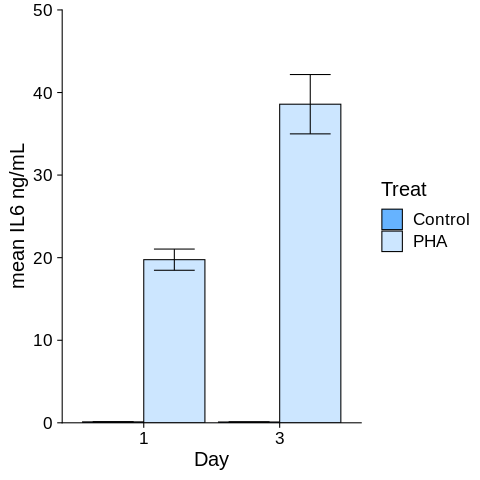

In [ ]:
%%R
p2<-sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge(),colour="black")+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6),position=position_dodge(.9), width=0.6)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))+
scale_fill_manual(values=c('#66b3ff','#cce6ff'))+theme_cowplot(font_size = 20)+
ylab("mean IL6 ng/mL")
p2

In [ ]:
%%R
IL6$group<-factor(paste0(IL6$Treat,"_",IL6$Day))
str(IL6)

tibble [15 × 5] (S3: tbl_df/tbl/data.frame)
 $ Treat : chr [1:15] "Control" "Control" "Control" "PHA" ...
 $ Conc  : num [1:15] 0.111 0.111 0.107 18.534 19.611 ...
 $ Day   : num [1:15] 1 1 1 1 1 1 1 1 3 3 ...
 $ Treat2: chr [1:15] "1" "1" "1" "2" ...
 $ group : Factor w/ 4 levels "Control_1","Control_3",..: 1 1 1 3 3 3 3 3 2 2 ...


In [ ]:
%%R
t.test(Conc~Treat, data=IL6)


	Welch Two Sample t-test

data:  Conc by Treat
t = -8.2371, df = 8, p-value = 3.537e-05
alternative hypothesis: true difference in means between group Control and group PHA is not equal to 0
95 percent confidence interval:
 -35.86970 -20.17873
sample estimates:
mean in group Control     mean in group PHA 
            0.1018694            28.1260859 



In [ ]:
%%R
pha<-IL6%>%filter(group %in% c("PHA_1", "PHA_3"))

In [ ]:
%%R
pha

# A tibble: 9 × 5
  Treat  Conc   Day Treat2 group
  <chr> <dbl> <dbl> <chr>  <fct>
1 PHA    18.5     1 2      PHA_1
2 PHA    19.6     1 2      PHA_1
3 PHA    19.2     1 2      PHA_1
4 PHA    19.6     1 2      PHA_1
5 PHA    21.9     1 2      PHA_1
6 PHA    33.3     3 2      PHA_3
7 PHA    39.7     3 2      PHA_3
8 PHA    39.9     3 2      PHA_3
9 PHA    41.4     3 2      PHA_3


In [ ]:
%%R
pha
t.test(Conc~group,data=pha)


	Welch Two Sample t-test

data:  Conc by group
t = -9.988, df = 3.6147, p-value = 0.0009248
alternative hypothesis: true difference in means between group PHA_1 and group PHA_3 is not equal to 0
95 percent confidence interval:
 -24.29456 -13.36959
sample estimates:
mean in group PHA_1 mean in group PHA_3 
           19.75627            38.58835 



In [ ]:
%%R
install.packages("rstatix")

In [ ]:
%%R
library(rstatix)

Attaching package: ‘rstatix’



    filter




In [ ]:
%%R
IL6 %>%
t_test(data =., Conc ~ group) %>%
adjust_pvalue(method = "bonferroni") %>%
add_significance("p.adj")

# A tibble: 6 × 10
  .y.   group1   group2    n1    n2 statistic    df       p   p.adj p.adj.signif
  <chr> <chr>    <chr>  <int> <int>     <dbl> <dbl>   <dbl>   <dbl> <chr>       
1 Conc  Control… Contr…     3     3      4.15  2.47 3.7 e-2 2.22e-1 ns          
2 Conc  Control… PHA_1      3     5    -34.3   4.00 4.33e-6 2.60e-5 ****        
3 Conc  Control… PHA_3      3     4    -21.4   3.00 2.23e-4 1.34e-3 **          
4 Conc  Control… PHA_1      3     5    -34.3   4.00 4.32e-6 2.59e-5 ****        
5 Conc  Control… PHA_3      3     4    -21.4   3.00 2.22e-4 1.33e-3 **          
6 Conc  PHA_1    PHA_3      5     4     -9.99  3.61 9.25e-4 5.55e-3 **          


##One-way ANOVA and Two-way ANOVA

In [ ]:
%%R
IL6.aov <- aov(Conc ~ group, data = IL6)
# Summary of the analysis
summary(IL6.aov)%>%tidy()

            Df Sum Sq Mean Sq F value   Pr(>F)    
group        3   3615  1205.1   292.7 9.05e-11 ***
Residuals   11     45     4.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
IL6.aov2 <- aov(Conc ~ Day + Treat, data = IL6)
summary(IL6.aov2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Day          1  351.4   351.4   11.60  0.00521 ** 
Treat        1 2945.9  2945.9   97.27 4.16e-07 ***
Residuals   12  363.4    30.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
IL6.aov2 <- aov(Conc ~ Day * Treat, data = IL6)
summary(IL6.aov2)

            Df Sum Sq Mean Sq F value   Pr(>F)    
Day          1  351.4   351.4   85.35 1.62e-06 ***
Treat        1 2945.9  2945.9  715.46 2.32e-11 ***
Day:Treat    1  318.1   318.1   77.26 2.64e-06 ***
Residuals   11   45.3     4.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R
aLM <- lm(Conc ~ group, data = IL6)
summary(aLM)


Call:
lm(formula = Conc ~ group, data = IL6)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2580 -0.1682  0.0002  0.5517  2.8573 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     0.10971    1.17153   0.094    0.927    
groupControl_3 -0.01568    1.65679  -0.009    0.993    
groupPHA_1     19.64656    1.48188  13.258 4.15e-08 ***
groupPHA_3     38.47864    1.54979  24.828 5.20e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.029 on 11 degrees of freedom
Multiple R-squared:  0.9876,	Adjusted R-squared:  0.9843 
F-statistic: 292.7 on 3 and 11 DF,  p-value: 9.053e-11



In [ ]:
%%R
a2LM <- lm(Conc ~ Day +Treat, data = IL6)
summary(a2LM)


Call:
lm(formula = Conc ~ Day + Treat, data = IL6)

Residuals:
   Min     1Q Median     3Q    Max 
-5.633 -4.287 -1.216  5.573  7.077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -5.516      2.661  -2.073  0.06037 .  
Day3          11.237      2.852   3.939  0.00197 ** 
TreatPHA      28.648      2.905   9.863 4.16e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.503 on 12 degrees of freedom
Multiple R-squared:  0.9007,	Adjusted R-squared:  0.8842 
F-statistic: 54.44 on 2 and 12 DF,  p-value: 9.573e-07



#Plotting with GGPLOT2

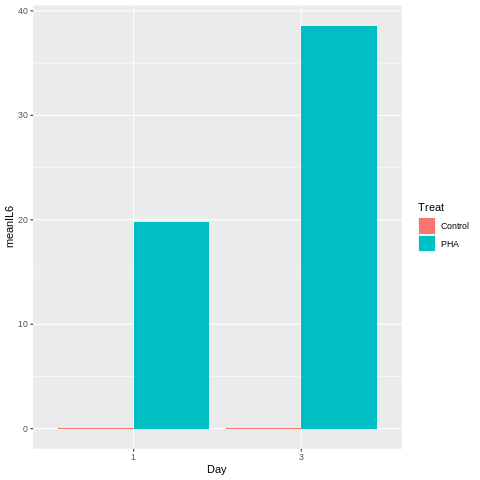

In [ ]:
%%R
#sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar()
sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity")
sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity",position = position_dodge())


Error bars

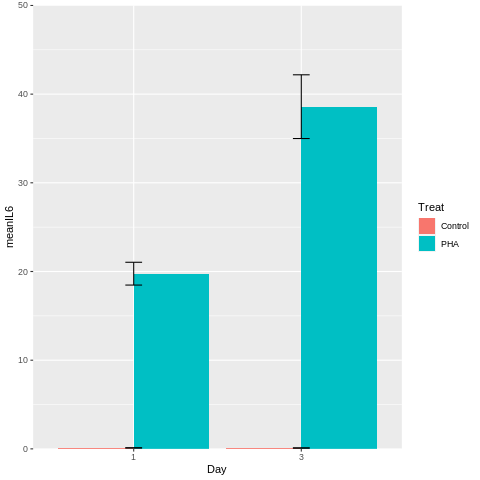

In [ ]:
%%R
sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge())+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6), width=.1)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))

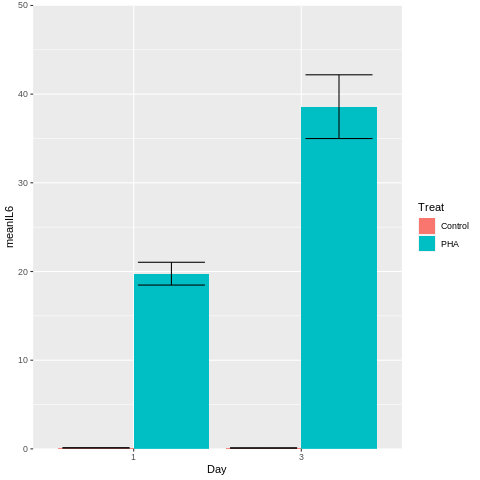

In [ ]:
%%R
sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge())+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6),position=position_dodge(.9), width=0.8)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))

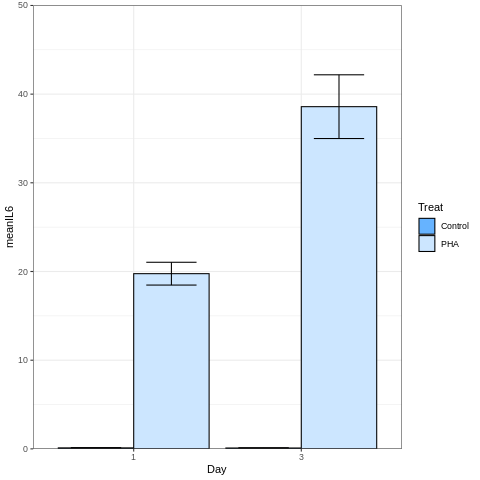

In [ ]:
%%R
p2<-sumIl6%>%ggplot(aes(Day, meanIL6, fill=Treat))+geom_bar(stat="identity", position = position_dodge(),colour="black")+
geom_errorbar(aes(ymin = meanIL6-sdIL6, ymax = meanIL6+sdIL6),position=position_dodge(.9), width=0.6)+
scale_y_continuous(limits = c(0, 50), expand = c(0, 0))+
scale_fill_manual(values=c('#66b3ff','#cce6ff'))+theme_bw()
ylab("mean IL6 ng/mL")
p2